In [60]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Conv2D, UpSampling2D, BatchNormalization, ReLU, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
# data_dir = r"E:\TY\EDAI\data"

# img_size = (64, 64)  # Image size for training

# datagen = ImageDataGenerator(rescale=1./255)
# train_data = datagen.flow_from_directory(
#     data_dir,
#     target_size=img_size,
#     batch_size=32,
#     class_mode=None
# )


In [10]:
def build_stage1_generator():
    # Input layers for text embedding and noise
    input_text = Input(shape=(100,))
    input_noise = Input(shape=(100,))

    # Combine text embedding with noise using Concatenate layer
    x = Concatenate()([input_text, input_noise])
    x = Dense(128 * 16 * 16, activation="relu")(x)
    x = Reshape((16, 16, 128))(x)

    # Upsampling layers to progressively increase the image size
    x = UpSampling2D()(x)
    x = Conv2D(64, kernel_size=3, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = UpSampling2D()(x)
    x = Conv2D(32, kernel_size=3, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Final output layer with tanh activation to produce RGB image output
    x = Conv2D(3, kernel_size=3, padding="same", activation="tanh")(x)

    # Define the generator model
    return Model([input_text, input_noise], x)

def build_stage1_discriminator():
    # Input layer for real or generated image
    input_image = Input(shape=(64, 64, 3))
    
    # Convolutional layers for the discriminator
    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(input_image)
    x = ReLU()(x)
    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)

    # Define the discriminator model
    return Model(input_image, x)

# Instantiate the generator and discriminator models for Stage-I
stage1_gen = build_stage1_generator()
stage1_disc = build_stage1_discriminator()

In [39]:
# optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

# stage1_disc.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# stage1_disc.trainable = False

# noise = Input(shape=(100,))
# text = Input(shape=(100,))
# generated_image = stage1_gen([text, noise])
# validity = stage1_disc(generated_image)

# stage1_gan = Model([text, noise], validity)
# stage1_gan.compile(loss='binary_crossentropy', optimizer=optimizer)
# Instantiate models
# Instantiate models
stage1_gen = build_stage1_generator()
stage1_disc = build_stage1_discriminator()

# Define optimizers
optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

# Compile discriminator with binary crossentropy loss
stage1_disc.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Rebuild and compile the combined GAN model
input_text = Input(shape=(100,))
input_noise = Input(shape=(100,))
generated_image = stage1_gen([input_text, input_noise])

# Freeze the discriminator during generator training
stage1_disc.trainable = False
validity = stage1_disc(generated_image)
stage1_gan = Model([input_text, input_noise], validity)
stage1_gan.compile(loss='binary_crossentropy', optimizer=optimizer)



In [51]:
data_dir = r"E:\TY\EDAI\data"
batch_size = 32

# Load dataset and preprocess
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode=None,
    image_size=(64, 64),
    batch_size=batch_size
)

# Normalize images to [-1, 1] range
train_data = train_data.map(lambda x: (x / 127.5) - 1)


Found 42000 files.


Found 3500 files.


C:\Users\Prathamesh\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_714', 'keras_tensor_715']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

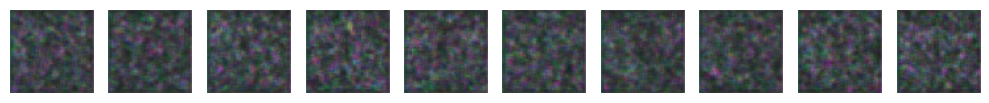

0/21 [D loss: 0.5521, acc: 75.00%] [G loss: 0.1017]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━

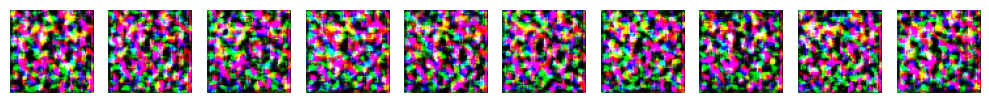

5/21 [D loss: 1.6587, acc: 75.00%] [G loss: 0.0215]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━

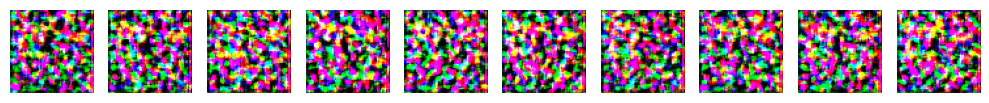

10/21 [D loss: 1.9285, acc: 75.00%] [G loss: 0.0122]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━

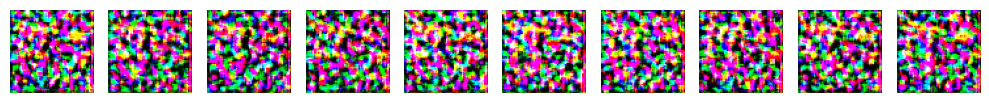

15/21 [D loss: 2.0786, acc: 75.00%] [G loss: 0.0086]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


In [ ]:
# from tensorflow.keras.callbacks import ModelCheckpoint
# import os

# # Create directory to save checkpoints
# checkpoint_dir = './checkpoints'
# os.makedirs(checkpoint_dir, exist_ok=True)

# # Initialize models
# stage1_gen = build_stage1_generator()
# stage1_disc = build_stage1_discriminator()

# # Training Parameters
# batch_size = 32
# epochs = 10
# real = np.ones((batch_size, 1))
# fake = np.zeros((batch_size, 1))

# # Data loader and normalization
# data_dir = r"E:\small_data"
# train_data = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir, label_mode=None, image_size=(64, 64), batch_size=batch_size
# )
# train_data = train_data.map(lambda x: (x / 127.5) - 1)

# # Define inputs for the GAN model
# text_input = tf.keras.layers.Input(shape=(100,), name='text_embeddings')
# noise_input = tf.keras.layers.Input(shape=(100,), name='noise')

# # Create the GAN model
# gan_output = stage1_disc(stage1_gen([text_input, noise_input]))
# stage1_gan = tf.keras.Model([text_input, noise_input], gan_output)

# # Compile the GAN model
# gan_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
# stage1_gan.compile(loss="binary_crossentropy", optimizer=gan_optimizer)

# # Training loop
# for epoch in range(epochs):
#     for real_images in train_data:
#         if real_images.shape[0] != batch_size:
#             continue  # Skip if batch is incomplete

#         # Generate random noise and text embeddings
#         noise = np.random.normal(0, 1, (batch_size, 100))
#         text_embeddings = np.random.normal(0, 1, (batch_size, 100))

#         # Generate fake images
#         generated_images = stage1_gen.predict([text_embeddings, noise])

#         # Define and compile a new optimizer for the discriminator
#         disc_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
#         stage1_disc.compile(loss="binary_crossentropy", optimizer=disc_optimizer, metrics=["accuracy"])

#         # Train discriminator on real and fake images
#         d_loss_real = stage1_disc.train_on_batch(real_images, real)
#         d_loss_fake = stage1_disc.train_on_batch(generated_images, fake)
#         d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

#         # Freeze discriminator and recompile the GAN model
#         stage1_disc.trainable = False
        
#         # Train generator (through the combined model)
#         g_loss = stage1_gan.train_on_batch([text_embeddings, noise], real)

#     # Save model checkpoints every 10 epochs
#     if epoch % 10 == 0:
#         stage1_gen.save_weights(os.path.join(checkpoint_dir, f'stage1_gen_epoch_{epoch:02d}.weights.h5'))
#         stage1_disc.save_weights(os.path.join(checkpoint_dir, f'stage1_disc_epoch_{epoch:02d}.weights.h5'))


#     # Display progress
#     print(f"{epoch}/{epochs} [D loss: {d_loss[0]:.4f}, acc: {100 * d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")


import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Function to display generated images
def plot_generated_images(epoch, text_embeddings, noise, num_images=10):
    generated_images = stage1_gen.predict([text_embeddings, noise])

    # Plot images
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow((generated_images[i] + 1) / 2)  # Rescale to [0, 1]
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"generated_images_epoch_{epoch}.png")
    plt.show()

# Create directory to save checkpoints
checkpoint_dir = './checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Initialize models
stage1_gen = build_stage1_generator()
stage1_disc = build_stage1_discriminator()

# Training Parameters
batch_size = 32
epochs = 21
real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

# Data loader and normalization
data_dir = r"E:\small_data"
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, label_mode=None, image_size=(64, 64), batch_size=batch_size
)
train_data = train_data.map(lambda x: (x / 127.5) - 1)

# Define inputs for the GAN model
text_input = tf.keras.layers.Input(shape=(100,), name='text_embeddings')
noise_input = tf.keras.layers.Input(shape=(100,), name='noise')

# Create the GAN model
gan_output = stage1_disc(stage1_gen([text_input, noise_input]))
stage1_gan = tf.keras.Model([text_input, noise_input], gan_output)

# Compile the GAN model
gan_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
stage1_gan.compile(loss="binary_crossentropy", optimizer=gan_optimizer)

# Training loop
for epoch in range(epochs):
    for real_images in train_data:
        if real_images.shape[0] != batch_size:
            continue  # Skip if batch is incomplete

        # Generate random noise and text embeddings
        noise = np.random.normal(0, 1, (batch_size, 100))
        text_embeddings = np.random.normal(0, 1, (batch_size, 100))

        # Generate fake images
        generated_images = stage1_gen.predict([text_embeddings, noise])

        # Define and compile a new optimizer for the discriminator
        disc_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
        stage1_disc.compile(loss="binary_crossentropy", optimizer=disc_optimizer, metrics=["accuracy"])

        # Train discriminator on real and fake images
        d_loss_real = stage1_disc.train_on_batch(real_images, real)
        d_loss_fake = stage1_disc.train_on_batch(generated_images, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Freeze discriminator and recompile the GAN model
        stage1_disc.trainable = False
        
        # Train generator (through the combined model)
        g_loss = stage1_gan.train_on_batch([text_embeddings, noise], real)

    # Save model checkpoints every 10 epochs
    if epoch % 10 == 0:
        stage1_gen.save_weights(os.path.join(checkpoint_dir, f'stage1_gen_epoch_{epoch:02d}.weights.h5'))
        stage1_disc.save_weights(os.path.join(checkpoint_dir, f'stage1_disc_epoch_{epoch:02d}.weights.h5'))

    # Display images every 5 epochs
    if epoch % 5 == 0:
        plot_generated_images(epoch, text_embeddings, noise)

    # Display progress
    print(f"{epoch}/{epochs} [D loss: {d_loss[0]:.4f}, acc: {100 * d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")



In [92]:
from tensorflow.keras.layers import Input, Dense, UpSampling2D, Concatenate, Conv2D, BatchNormalization, ReLU, Reshape, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np
import tensorflow as tf

# Define the optimizer
optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

# Define loss functions
discriminator_loss_fn = BinaryCrossentropy(from_logits=False)  # Use from_logits=False for sigmoid
generator_loss_fn = BinaryCrossentropy(from_logits=False)  # Use from_logits=False for sigmoid

def build_stage2_gen():
    # Image input from Stage-I generator output
    image_input = Input(shape=(64, 64, 3))
    x = UpSampling2D(size=(4, 4))(image_input)  # Upsample from 64x64 to 256x256

    # Text input
    text_input = Input(shape=(100,))
    text_features = Dense(256, activation="relu")(text_input)
    text_features = Reshape((1, 1, 256))(text_features)
    text_features = UpSampling2D(size=(256, 256))(text_features)  # Match image dimensions

    # Concatenate image and text features
    combined = Concatenate()([x, text_features])

    # Additional refinement layers
    x = Conv2D(64, kernel_size=3, padding="same", activation="relu")(combined)
    x = BatchNormalization()(x)
    x = Conv2D(32, kernel_size=3, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    # Change activation from 'tanh' to 'sigmoid' for the final layer
    x = Conv2D(3, kernel_size=3, padding="same", activation="tanh")(x)

    return Model([image_input, text_input], x)

def build_stage2_discriminator():
    input_image = Input(shape=(256, 256, 3))
    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(input_image)
    x = ReLU()(x)
    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)

    return Model(input_image, x)

# Instantiate Stage-II generator and discriminator models
stage2_gen = build_stage2_gen()
stage2_disc = build_stage2_discriminator()

# Compile the discriminator (without updating it during GAN training)
stage2_disc.compile(loss=discriminator_loss_fn, optimizer=optimizer, metrics=['accuracy'])

# Stage-II GAN combining generator and discriminator
stage1_image_input = Input(shape=(64, 64, 3))
text_input = Input(shape=(100,))
generated_image = stage2_gen([stage1_image_input, text_input])
validity = stage2_disc(generated_image)

# Create and compile the Stage-II GAN model (generator trained via GAN)
stage2_gan = Model([stage1_image_input, text_input], validity)
stage2_gan.compile(loss=generator_loss_fn, optimizer=optimizer)


# Training parameters
epochs = 20  # Adjust as needed
batch_size = 32

# Example training loop for Stage-II
# Training loop
for epoch in range(epochs):
    try:
        # Generate noise and text embeddings for Stage-I
        noise = np.random.normal(0, 1, (batch_size, 100))
        text_embeddings = np.random.normal(0, 1, (batch_size, 100))

        # Generate coarse images from Stage-I generator
        stage1_images = stage1_gen.predict([text_embeddings, noise])

        # Generate refined images in Stage-II generator
        generated_images = stage2_gen.predict([stage1_images, text_embeddings])

        # Fetch real images from the training data iterator
        real_images = next(train_data_iterator)

        # Resize real images to 256x256 if they are not already
        if real_images.shape[1:3] != (256, 256):
            real_images = tf.image.resize(real_images, (256, 256)).numpy()

        # Ensure batch size matches
        if real_images.shape[0] != batch_size:
            continue  # Skip if batch is incomplete

        # Train the discriminator on real and fake images
        with tf.GradientTape() as tape:
            stage2_disc.trainable = True  # Make sure discriminator is trainable

            # Get predictions for real and generated (fake) images
            real_preds = stage2_disc(real_images, training=True)
            fake_preds = stage2_disc(generated_images, training=True)

            # Modify labels for tanh (real = 1, fake = -1)
            d_loss_real = discriminator_loss_fn(tf.ones_like(real_preds), real_preds)
            d_loss_fake = discriminator_loss_fn(-tf.ones_like(fake_preds), fake_preds)

            # Total discriminator loss
            d_loss = 0.5 * (d_loss_real + d_loss_fake)

        # Check if the discriminator loss is NaN
        if tf.reduce_any(tf.math.is_nan(d_loss)):
            print("Discriminator Loss is NaN.")
        else:
            print(f"Discriminator Loss: {d_loss.numpy()}")

        # Calculate gradients and update the discriminator
        grads = tape.gradient(d_loss, stage2_disc.trainable_variables)
        if grads is None or all(grad is None for grad in grads):
            print("No gradients for discriminator.")
            continue

        optimizer.apply_gradients(zip(grads, stage2_disc.trainable_variables))

        # Now train the generator
        with tf.GradientTape() as tape:
            stage2_disc.trainable = False  # Ensure the discriminator is frozen

            # Get discriminator predictions for the generated images
            fake_preds = stage2_disc(generated_images, training=False)

            # Compute generator loss
            g_loss = generator_loss_fn(tf.ones_like(fake_preds), fake_preds)

        # Check if the generator loss is NaN
        if tf.reduce_any(tf.math.is_nan(g_loss)):
            print("Generator Loss is NaN.")
        else:
            print(f"Generator Loss: {g_loss.numpy()}")

        # Calculate gradients for the generator
        grads = tape.gradient(g_loss, stage2_gen.trainable_variables)
        if grads is None or all(grad is None for grad in grads):
            print("No gradients for generator.")
            continue

        optimizer.apply_gradients(zip(grads, stage2_gen.trainable_variables))

        # Display progress every epoch
        print(f"{epoch + 1}/{epochs}, Stage-II D loss: {d_loss.numpy():.4f}, G loss: {g_loss.numpy():.4f}")

    except StopIteration:
        # Reset the data iterator when the dataset is exhausted
        train_data_iterator = iter(train_data)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


C:\Users\Prathamesh\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_651', 'keras_tensor_653']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Discriminator Loss: 0.6835720539093018
Generator Loss: 8.757366180419922
No gradients for generator.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Discriminator Loss: -4.246159076690674
Generator Loss: 18.1912841796875
No gradients for generator.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Discriminator Loss: -9.412763595581055
Generator Loss: 29.396005630493164
No gradients for generator.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Discriminator Loss: -13.27467155456543
Generator Loss: 35.994293212890625
No gradients for generator.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Discriminator Loss: -17.81968116760254
Generator Loss: 45.974632263183594
No gradients for generator.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Discriminator Loss: -24.80902862548828
Generator Loss: 61.533042907714844
No gradi

In [64]:
# optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

# stage2_disc.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# stage2_disc.trainable = False

# # Inputs for GAN
# stage1_image_input = Input(shape=(64, 64, 3))
# text_input = Input(shape=(100,))
# generated_image = stage2_gen([stage1_image_input, text_input])
# validity = stage2_disc(generated_image)

# stage2_gan = Model([stage1_image_input, text_input], validity)
# stage2_gan.compile(loss='binary_crossentropy', optimizer=optimizer)

# # Example training loop for Stage-II
# for epoch in range(epochs):
#     # Generate coarse images from Stage-I
#     noise = np.random.normal(0, 1, (batch_size, 100))
#     text_embeddings = np.random.normal(0, 1, (batch_size, 100))
#     stage1_images = stage1_gen.predict([text_embeddings, noise])

#     # Generate refined images in Stage-II
#     generated_images = stage2_gen.predict([stage1_images, text_embeddings])

#     # Train the discriminator with real and fake images
#     real_images = next(train_data)  # Fetch real images
#     d_loss_real = stage2_disc.train_on_batch(real_images, np.ones((batch_size, 1)))
#     d_loss_fake = stage2_disc.train_on_batch(generated_images, np.zeros((batch_size, 1)))
#     d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

#     # Train the generator
#     g_loss = stage2_gan.train_on_batch([stage1_images, text_embeddings], np.ones((batch_size, 1)))

#     print(f"{epoch}/{epochs}, Stage II D loss: {d_loss}, G loss: {g_loss}")

# from tensorflow.keras.layers import Dense, Flatten, Concatenate, Reshape
# from tensorflow.keras.models import Model

# # Redefine stage2_gen as a functional model to combine the image and text inputs
# def build_stage2_gen():
#     # Image input from Stage-I generator output
#     image_input = Input(shape=(64, 64, 3))
#     x = UpSampling2D(size=(4, 4))(image_input)  # Upsample from 64x64 to 256x256
    
#     # Text input
#     text_input = Input(shape=(100,))
#     text_features = Dense(256, activation="relu")(text_input)
#     text_features = Reshape((1, 1, 256))(text_features)
#     text_features = UpSampling2D(size=(256, 256))(text_features)  # Match image dimensions

#     # Concatenate image and text features
#     combined = Concatenate()([x, text_features])

#     # Additional refinement layers (example)
#     x = Conv2D(64, kernel_size=3, padding="same", activation="relu")(combined)
#     x = Conv2D(3, kernel_size=3, padding="same", activation="tanh")(x)

#     return Model([image_input, text_input], x)

# def build_stage2_discriminator():
#     input_image = Input(shape=(256, 256, 3))  # Assuming you want 128x128 output
#     x = Conv2D(64, kernel_size=3, strides=2, padding="same")(input_image)
#     x = ReLU()(x)
#     x = Flatten()(x)
#     x = Dense(1, activation='sigmoid')(x)

#     return Model(input_image, x)

# # Instantiate Stage II models
# stage2_gen = build_stage2_gen()
# stage2_disc = build_stage2_discriminator()

# # Build and compile stage2_gen with the new structure

# # Ensure the discriminator is compiled before training
# stage2_disc.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# stage2_disc.trainable = False

# # Define inputs for the GAN
# stage1_image_input = Input(shape=(64, 64, 3))
# text_input = Input(shape=(100,))
# generated_image = stage2_gen([stage1_image_input, text_input])
# validity = stage2_disc(generated_image)

# # Create and compile the Stage-II GAN model
# stage2_gan = Model([stage1_image_input, text_input], validity)
# stage2_gan.compile(loss='binary_crossentropy', optimizer=optimizer)

# # Continue with the training loop as before
# train_data_iterator = iter(train_data)

# # Example training loop for Stage-II
# for epoch in range(epochs):
#     try:
#         # Generate coarse images from Stage-I
#         noise = np.random.normal(0, 1, (batch_size, 100))
#         text_embeddings = np.random.normal(0, 1, (batch_size, 100))
#         stage1_images = stage1_gen.predict([text_embeddings, noise])

#         # Generate refined images in Stage-II
#         generated_images = stage2_gen.predict([stage1_images, text_embeddings])

#         # Fetch real images for the discriminator
#         real_images = next(train_data_iterator)
        
#         # Ensure batch size matches
#         if real_images.shape[0] != batch_size:
#             continue  # Skip if batch is incomplete

#         # Train the discriminator on real and fake images
#         d_loss_real = stage2_disc.train_on_batch(real_images, np.ones((batch_size, 1)))
#         d_loss_fake = stage2_disc.train_on_batch(generated_images, np.zeros((batch_size, 1)))
#         d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

#         # Train the generator through the GAN model
#         g_loss = stage2_gan.train_on_batch([stage1_images, text_embeddings], np.ones((batch_size, 1)))

#         # Display progress every epoch
#         print(f"{epoch + 1}/{epochs}, Stage II D loss: {d_loss[0]:.4f}, acc: {100 * d_loss[1]:.2f}%, G loss: {g_loss:.4f}")

#     except StopIteration:
#         # Reset the data iterator when the dataset is exhausted
#         train_data_iterator = iter(train_data)

# # Checkpoints (optional, save model weights)
# checkpoint_dir = "./checkpoints"
# os.makedirs(checkpoint_dir, exist_ok=True)
# checkpoint_gen = ModelCheckpoint(
#     filepath=os.path.join(checkpoint_dir, 'stage2_gen_epoch_{epoch:02d}.h5'),
#     save_weights_only=True,
#     save_freq='epoch'
# )
# checkpoint_disc = ModelCheckpoint(
#     filepath=os.path.join(checkpoint_dir, 'stage2_disc_epoch_{epoch:02d}.h5'),
#     save_weights_only=True,
#     save_freq='epoch'
# )

print(stage2_gen.summary())




Model: "functional_59"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_100     │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 256)       │     25,856 │ input_layer_100[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_99      │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_23          │ (None, 1, 1, 256) │          0 │ dense_42[0][0]    │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_48    │ (None, 256, 256,  │          0 │ input_layer_99[0… │
│ (UpSampling2D)      │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_49    │ (None, 256, 256,  │          0 │ reshape_23[0][0]  │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_23      │ (None, 256, 256,  │          0 │ up_sampling2d_48… │
│ (Concatenate)       │ 259)              │            │ up_sampling2d_49… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_82 (Conv2D)  │ (None, 256, 256,  │    149,248 │ concatenate_23[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_82[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_83 (Conv2D)  │ (None, 256, 256,  │     18,464 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        128 │ conv2d_83[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_84 (Conv2D)  │ (None, 256, 256,  │        867 │ batch_normalizat… │
│                     │ 3)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 194,819 (761.01 KB)

 Trainable params: 194,627 (760.26 KB)

 Non-trainable params: 192 (768.00 B)

None


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


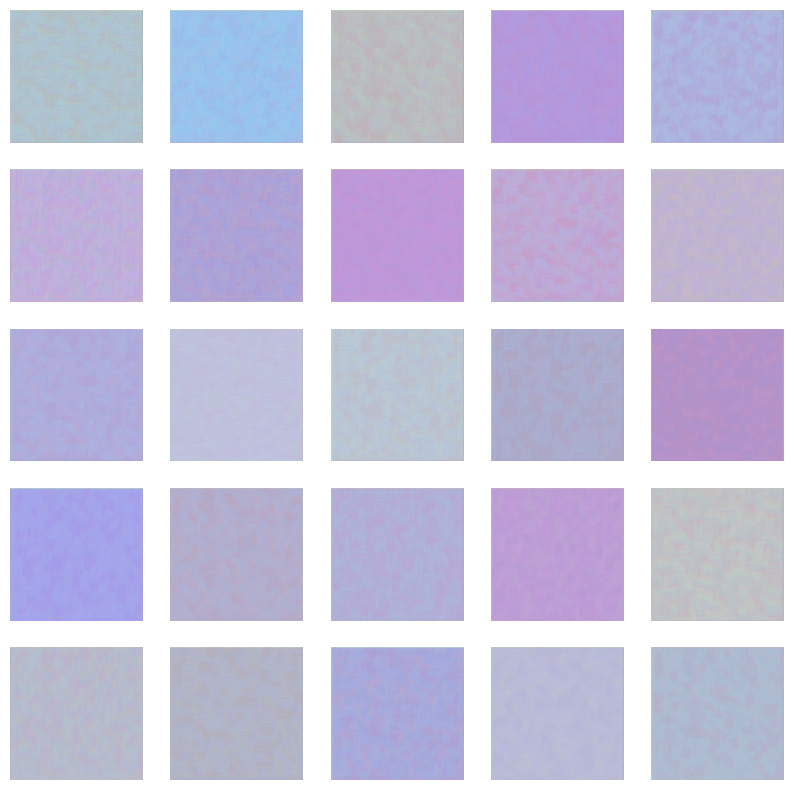

In [90]:
import matplotlib.pyplot as plt

def show_images(images, n):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(5, 5, i + 1)
        plt.imshow((images[i] * 127.5 + 127.5).astype(np.uint8))
        plt.axis('off')
    plt.show()

# Generate and visualize samples
noise = np.random.normal(0, 1, (25, 100))
text_embeddings = np.random.normal(0, 1, (25, 100))
generated_images = stage2_gen.predict([stage1_gen.predict([text_embeddings, noise]), text_embeddings])
show_images(generated_images, 25)



